In [1]:
%load_ext autoreload
%autoreload 2

In [204]:
import pennylane as qml

In [181]:
import pennylane.numpy as np
import matplotlib.pyplot as plt
import vqd
import json

In [80]:
large_width = 400
np.set_printoptions(linewidth=large_width)

In [81]:
total_time = 2.0
#total_time = 0.5
dt = 0.05
max_iterations = 500
cost_threshold = 0.0001
n_qubits = 3
interface = 'autograd'

In [151]:
vqdrunner = vqd.VQD(interface, total_time, dt, max_iterations, cost_threshold, n_qubits, shots=80, optimization_step_size=0.05)

In [152]:
results = vqdrunner.run_optimization()

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0


In [153]:
results.keys()

dict_keys(['final_costs_v_time', 'full_costs_v_time', 'final_params_v_time', 'full_params_v_time', 'failed_to_converge_times', 'number_of_iterations_to_converge', 'observables', 'variances', 'time'])

In [154]:
sig_x = np.tensor(results['observables'])[:,:3]
sig_z = np.tensor(results['observables'])[:,3:]
std_sig_x = np.sqrt(np.tensor(results['variances'])[:,:3]/vqdrunner.shots)
std_sig_z = np.sqrt(np.tensor(results['variances'])[:,3:]/vqdrunner.shots)

sum_sig_x = np.sum(sig_x, axis=1)
sum_sig_z = np.sum(sig_z, axis=1)
sum_sig_x_std = np.sqrt(np.sum(std_sig_x**2, axis=1))
sum_sig_z_std = np.sqrt(np.sum(std_sig_z**2, axis=1))

Text(0.5, 1.0, 'Shots = 80')

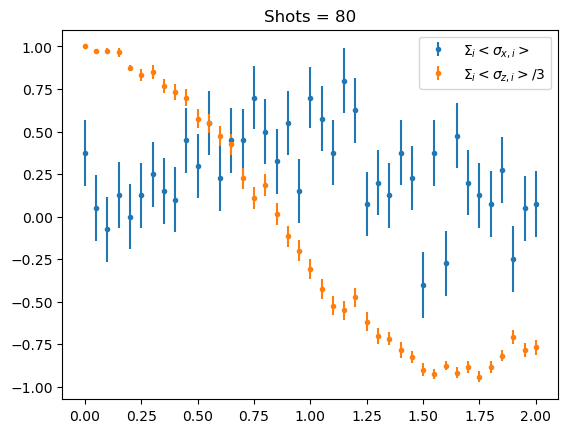

In [155]:
plt.errorbar(results['time'],sum_sig_x, sum_sig_x_std, fmt = '.', label='$\Sigma_i <\sigma_{x,i}>$')
plt.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label='$\Sigma_i <\sigma_{z,i}>/3$')
plt.legend()
plt.title(f'Shots = {vqdrunner.shots}')

Text(0.5, 1.0, 'Shots = 80')

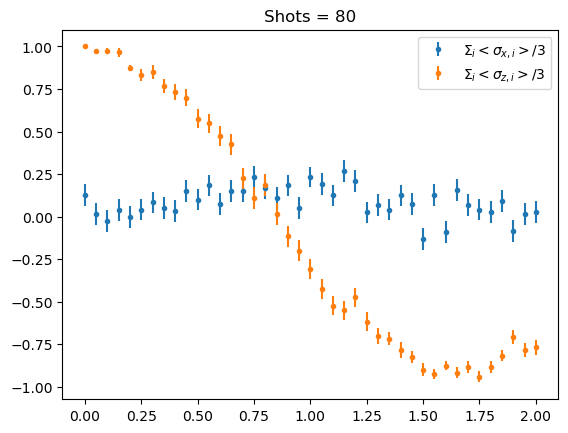

In [156]:
plt.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label='$\Sigma_i <\sigma_{x,i}>/3$')
plt.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label='$\Sigma_i <\sigma_{z,i}>/3$')
plt.legend()
plt.title(f'Shots = {vqdrunner.shots}')

Text(0.5, 1.0, 'Shots = 80')

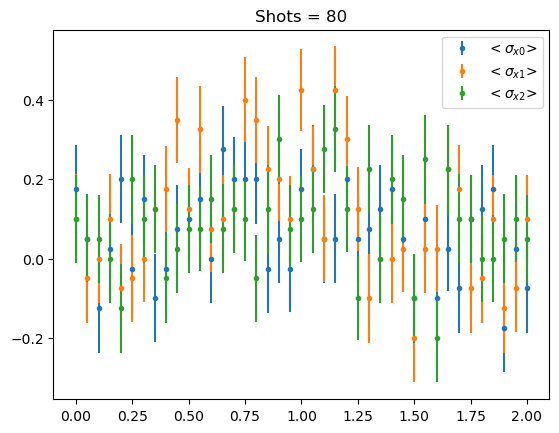

In [158]:
plt.errorbar(results['time'],sig_x[:,0], std_sig_x[:,0], fmt='.', label='$<\sigma_{x0}$>')
plt.errorbar(results['time'],sig_x[:,1], std_sig_x[:,1], fmt='.', label='$<\sigma_{x1}$>')
plt.errorbar(results['time'],sig_x[:,2], std_sig_x[:,2], fmt='.', label='$<\sigma_{x2}$>')
plt.legend()
plt.title(f'Shots = {vqdrunner.shots}')

In [196]:
shots_list = [80, 800, 8000, 80000]
results_over_shots_with_observables = []
for shots in shots_list:
    print(f'starting run for shots: {shots}')
    vqdrunner = vqd.VQD(interface, total_time, dt, max_iterations, cost_threshold, n_qubits, shots=shots, optimization_step_size=0.05)
    results_over_shots_with_observables.append(vqdrunner.run_optimization())

starting run for shots: 80
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
starting run for shots: 800
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
starting run for shots: 8000
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.600000

In [214]:
def get_total_mag(results, shots):
    sig_x = np.tensor(results['observables'])[:,:3]
    sig_z = np.tensor(results['observables'])[:,3:]
    std_sig_x = np.sqrt(np.tensor(results['variances'])[:,:3]/shots)
    std_sig_z = np.sqrt(np.tensor(results['variances'])[:,3:]/shots)

    sum_sig_x = np.sum(sig_x, axis=1)
    sum_sig_z = np.sum(sig_z, axis=1)
    sum_sig_x_std = np.sqrt(np.sum(std_sig_x**2, axis=1))
    sum_sig_z_std = np.sqrt(np.sum(std_sig_z**2, axis=1))
    
    return sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std

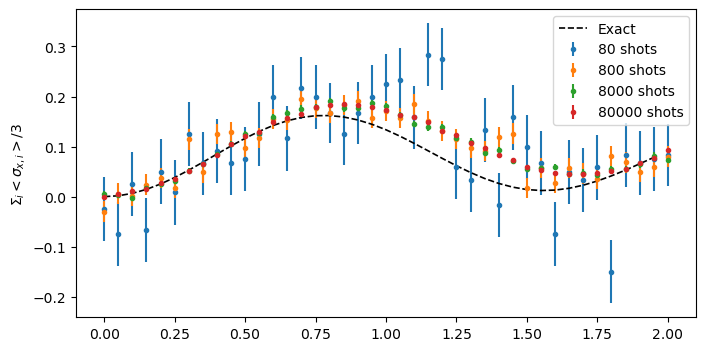

In [215]:
fig, ax = plt.subplots(figsize=(8,4))
for s, results in zip(shots_list,results_over_shots_with_observables):
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{x,i}>/3$')
    
exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sx'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.legend()


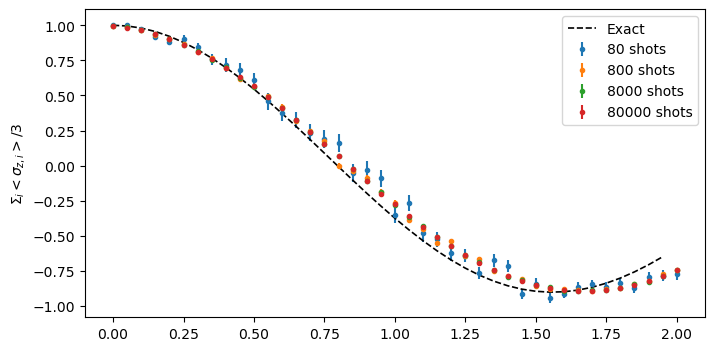

In [217]:
fig, ax = plt.subplots(figsize=(8,4))
for s, results in zip(shots_list,results_over_shots_with_observables):
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{z,i}>/3$')

exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sz'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.legend()

In [189]:
shots_list = [80, 800, 8000, 80000]
results_over_shots = []
for shots in shots_list:
    results_stats = []
    for i in range(10):
        print(f'starting run for shots: {shots}-{i}')
        vqdrunner = vqd.VQD(interface, total_time, dt, max_iterations, cost_threshold, n_qubits, shots=shots, optimization_step_size=0.05)
        results_stats.append(vqdrunner.run_optimization(compute_observables=False))
        
    results_over_shots.append(results_stats)

starting run for shots: 80-0
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
starting run for shots: 80-1
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
starting run for shots: 80-2
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.600

In [245]:
len(results_over_shots[0])

10

In [190]:
state_results = {}
for results, shots in zip(results_over_shots, shots_list):
    state_results[shots] = results

In [191]:
state_results.keys()

dict_keys([80, 800, 8000, 80000])

In [219]:
d = qml.data.Dataset(state_results = state_results)

In [220]:
d.write('state_results.dat')

In [221]:
observable_results = {}
for results, shots in zip(results_over_shots_with_observables, shots_list):
    observable_results[shots] = results


In [222]:
d_observables = qml.data.Dataset(observable_results = observable_results)

In [246]:
d_observables.write('observable_results.dat')

In [224]:
len(state_results[80])

10

In [241]:
r = state_results[80][0]

In [242]:
r.keys()

dict_keys(['final_costs_v_time', 'full_costs_v_time', 'final_params_v_time', 'full_params_v_time', 'failed_to_converge_times', 'number_of_iterations_to_converge', 'observables', 'variances', 'time'])

In [243]:
r['final_costs_v_time']

[9.169946285647601e-05,
 9.169042804524352e-05,
 9.178110701335562e-05,
 9.216247878185424e-05,
 9.288909701010706e-05,
 9.378442521423835e-05,
 9.454314951373721e-05,
 9.492039157887877e-05,
 9.490091882924379e-05,
 9.480448011622844e-05,
 9.531562065712151e-05,
 9.741391996942461e-05,
 9.383505758542299e-05,
 9.451705902285834e-05,
 9.904022820450553e-05,
 9.99167597194317e-05,
 9.662366417539925e-05,
 9.925327105064774e-05,
 9.677407755770417e-05,
 9.848498439946063e-05,
 9.87825893883354e-05,
 9.969458703884548e-05,
 9.64499087862114e-05,
 9.521016417601835e-05,
 9.595111835658532e-05,
 9.806963775160771e-05,
 9.448038282033888e-05,
 9.626915124349988e-05,
 9.642420165334453e-05,
 9.436586661615287e-05,
 9.606171543952158e-05,
 9.702885695850316e-05,
 9.90790630381877e-05,
 9.665296808281099e-05,
 9.70279522591877e-05,
 9.992868444130831e-05,
 9.836041192778922e-05,
 9.46024477513907e-05,
 9.74695193528552e-05,
 9.960440202094745e-05,
 9.896783481633253e-05]

In [240]:
r['final_costs_v_time']

[9.169946285647601e-05,
 9.169042804524352e-05,
 9.178110701335562e-05,
 9.216247878185424e-05,
 9.288909701010706e-05,
 9.378442521423835e-05,
 9.454314951373721e-05,
 9.492039157887877e-05,
 9.490091882924379e-05,
 9.480448011622844e-05,
 9.531562065712151e-05,
 9.741391996942461e-05,
 9.383505758542299e-05,
 9.451705902285834e-05,
 9.904022820450553e-05,
 9.99167597194317e-05,
 9.662366417539925e-05,
 9.925327105064774e-05,
 9.677407755770417e-05,
 9.848498439946063e-05,
 9.87825893883354e-05,
 9.969458703884548e-05,
 9.64499087862114e-05,
 9.521016417601835e-05,
 9.595111835658532e-05,
 9.806963775160771e-05,
 9.448038282033888e-05,
 9.626915124349988e-05,
 9.642420165334453e-05,
 9.436586661615287e-05,
 9.606171543952158e-05,
 9.702885695850316e-05,
 9.90790630381877e-05,
 9.665296808281099e-05,
 9.70279522591877e-05,
 9.992868444130831e-05,
 9.836041192778922e-05,
 9.46024477513907e-05,
 9.74695193528552e-05,
 9.960440202094745e-05,
 9.896783481633253e-05]

In [237]:
total_final_costs = []

for shots, results in state_results.items():
    sum_costs = 0
    sum_costs_sq = 0
    for i in range(10):
        sum_costs += np.sum(results[i]['final_costs_v_time'])
        sum_costs_sq += np.sum(results[i]['final_costs_v_time'])**2
        
    print(shots)
    print(sum_costs)
    print(sum_costs_sq)
    mean_costs = sum_costs/10
    var_costs = sum_costs_sq/10 - mean_costs**2
    std_mean_costs = np.sqrt(var_costs)
    total_final_costs.append([shots, mean_costs, std_mean_costs])

80
0.03944832045221114
0.00015561699865003392
800
0.03944832045221114
0.00015561699865003392
8000
0.03944832045221114
0.00015561699865003392
80000
0.03944832045221114
0.00015561699865003392


Doh! The state vector simulator does not depend on number of shots because it does not simulate shots. It returns the same state estimate every time. Therefore, we will not see any change in the sum of final costs or variance of that value!

In [250]:
for shots, results in d_observables.observable_results.items():
    print(results.keys())

dict_keys(['final_costs_v_time', 'full_costs_v_time', 'final_params_v_time', 'full_params_v_time', 'failed_to_converge_times', 'number_of_iterations_to_converge', 'observables', 'variances', 'time'])
dict_keys(['final_costs_v_time', 'full_costs_v_time', 'final_params_v_time', 'full_params_v_time', 'failed_to_converge_times', 'number_of_iterations_to_converge', 'observables', 'variances', 'time'])
dict_keys(['final_costs_v_time', 'full_costs_v_time', 'final_params_v_time', 'full_params_v_time', 'failed_to_converge_times', 'number_of_iterations_to_converge', 'observables', 'variances', 'time'])
dict_keys(['final_costs_v_time', 'full_costs_v_time', 'final_params_v_time', 'full_params_v_time', 'failed_to_converge_times', 'number_of_iterations_to_converge', 'observables', 'variances', 'time'])
